# Crime Data Analysis_ Part_First

Data: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston


1. Loading the Data
2. Defining parameters so we can work on differnt attributes of data
3. Defining custom function
4. Visualisation

In [1]:
# Importing all the Libraries:

%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd


In [3]:
crime = pd.read_csv("crime.csv", encoding='latin')
# the data format is not acceptable so we use the latin encoding:
crime.to_csv('df_crime.csv')
# saving the converted file into acceptable format and reading the file:
df = pd.read_csv('df_crime.csv', index_col='Unnamed: 0')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
df.shape

(319073, 17)

In [5]:
# Returns datatype and dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 43.8+ MB


In [6]:
# Crime committed on the Day the week:

crime_weekly= df.groupby(['DAY_OF_WEEK'])['DAY_OF_WEEK'].count()/len(df)*100
crime_weekly

DAY_OF_WEEK
Friday       15.198716
Monday       14.316160
Saturday     14.046315
Sunday       12.634413
Thursday     14.622359
Tuesday      14.536799
Wednesday    14.645238
Name: DAY_OF_WEEK, dtype: float64

In [7]:
# but the returned DAY_OF_WEEK are not in order:

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# sorting the data according to order of the week:

crime_weekly = crime_weekly[sorter]
crime_weekly

DAY_OF_WEEK
Monday       14.316160
Tuesday      14.536799
Wednesday    14.645238
Thursday     14.622359
Friday       15.198716
Saturday     14.046315
Sunday       12.634413
Name: DAY_OF_WEEK, dtype: float64

Text(0.5, 0, 'Day of the Week')

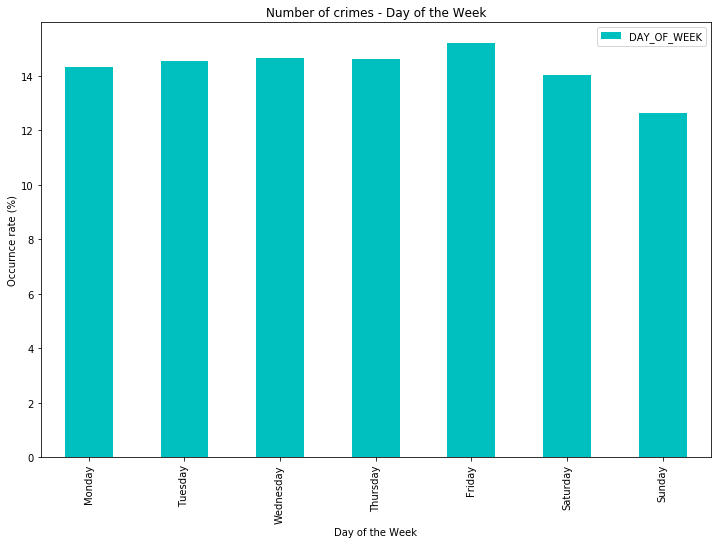

In [8]:
crime_weekly.plot(legend= True, kind='bar', title="Number of crimes - Day of the Week", figsize=(12,8), color='c')
plt.ylabel('Occurnce rate (%)')
plt.xlabel('Day of the Week')

In [9]:
# Crime committed Yearly:

crime_yearly= df.groupby(['YEAR'])['YEAR'].count()/len(df)*100
# Returns the % of crime in a particular year of total crimes comitted from 2015 to 2018

crime_yearly

YEAR
2015    16.732221
2016    31.063111
2017    31.618470
2018    20.586198
Name: YEAR, dtype: float64

Text(0.5, 0, 'Year')

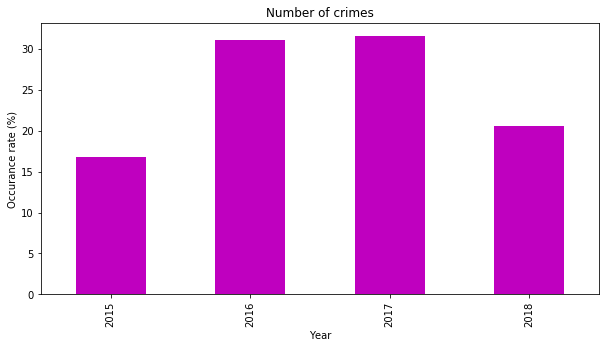

In [10]:
crime_yearly.plot(kind='bar', title="Number of crimes",  figsize=(10,5), color='m')
plt.ylabel('Occurance rate (%)')
plt.xlabel('Year')

In [11]:
# Crime committed Monthly:

crime_monthly= df.groupby(['MONTH'])['MONTH'].count()/len(df)*100
# Returns the % of crime in a particular year of total crimes comitted from 2015 to 2018

crime_monthly

MONTH
1      7.399561
2      6.786221
3      7.567547
4      7.548743
5      8.210974
6      9.580253
7     10.830124
8     10.913803
9      8.318786
10     8.066179
11     7.419932
12     7.357877
Name: MONTH, dtype: float64

Text(0.5, 0, 'Month')

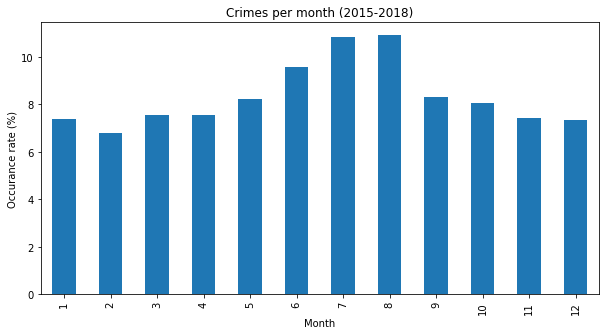

In [12]:
crime_monthly.plot(kind='bar', title="Crimes per month (2015-2018)",  figsize=(10,5))
plt.ylabel('Occurance rate (%)')
plt.xlabel('Month')

# Exploring the "SHOOTING" data

In [13]:
# creating a dataframe with no NaNs:

df_shooting = df[df.SHOOTING.notnull()]

In [29]:
df_shooting.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1295,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)"
1860,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)"
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
3260,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
4107,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)"


In [14]:
shooting_yearly= df_shooting.groupby(['YEAR'])['YEAR'].count()/len(df_shooting)*100

shooting_yearly

YEAR
2015    18.155054
2016    27.379784
2017    36.310108
2018    18.155054
Name: YEAR, dtype: float64

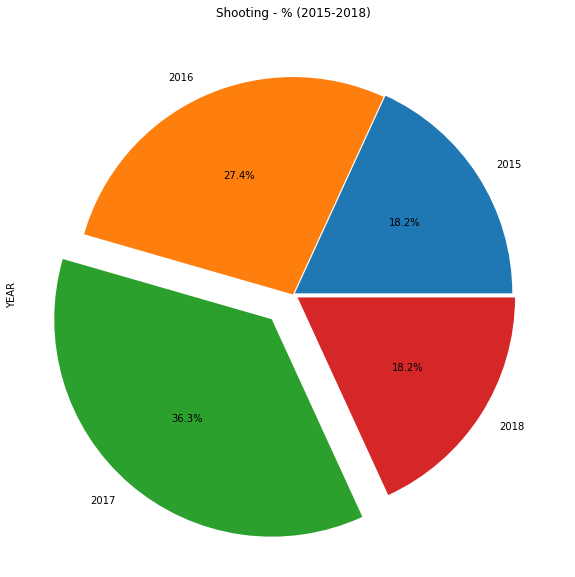

In [32]:
explode = [0.01,0,00.15,0.025]

shooting_yearly.plot.pie(autopct="%.1f%%", title="Shooting - % (2015-2018)", figsize=(20,10), explode=explode)

In [16]:
shooting_monthly= df_shooting.groupby(['MONTH'])['MONTH'].count()/len(df_shooting)*100
shooting_monthly

MONTH
1      6.869480
2      5.103042
3      3.827282
4      6.967615
5      6.967615
6     11.874387
7     13.248283
8     10.696762
9      7.850834
10     8.439647
11     7.065751
12    11.089303
Name: MONTH, dtype: float64

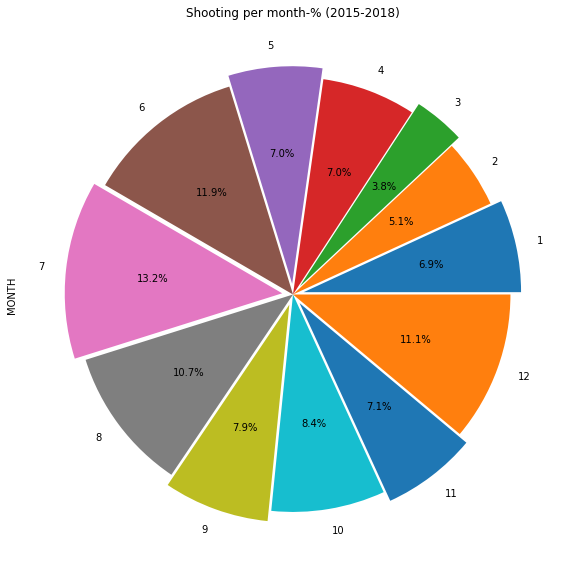

In [17]:
explode = [0.05,0,0.05,0,0.05,0,0.05,0,0.05,0,0.05,0]

shooting_monthly.plot.pie(autopct="%.1f%%", title="Shooting per month-% (2015-2018)", figsize=(20,10), fontsize=10, explode=explode)

# Working with the Offense data:

In [18]:
# finding all the typesof offenses without repetition:

df['OFFENSE_CODE_GROUP'].unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Medical Assistance', 'Assembly or Gathering Violations',
       'Larceny From Motor Vehicle', 'Residential Burglary',
       'Simple Assault', 'Restraining Order Violations', 'Violations',
       'Harassment', 'Ballistics', 'Property Found',
       'Police Service Incidents', 'Drug Violation', 'Warrant Arrests',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Aggravated Assault', 'License Plate Related Incidents',
       'Firearm Violations', 'Other Burglary', 'Arson', 'Bomb Hoax',
       'Harbor Related Incidents', 'Counterfeiting', 'Liquor Violation',
       'Firearm Discovery', 'Landlord/Tenant Disputes',
       'Missing Person Located', 'Auto Theft Recovery', 'Service',
       'Operating Und

In [19]:
# Creating a dataframe returing '%' of each crime offense

df_offense = df.groupby(['OFFENSE_CODE_GROUP'])['OFFENSE_CODE_GROUP'].count()/len(df)*100

In [20]:
df_offense

OFFENSE_CODE_GROUP
Aggravated Assault                            2.446776
Aircraft                                      0.011283
Arson                                         0.029460
Assembly or Gathering Violations              0.299305
Auto Theft                                    1.520342
Auto Theft Recovery                           0.329392
Ballistics                                    0.307453
Biological Threat                             0.000627
Bomb Hoax                                     0.023506
Burglary - No Property Taken                  0.000627
Commercial Burglary                           0.419026
Confidence Games                              0.986295
Counterfeiting                                0.455695
Criminal Harassment                           0.041056
Disorderly Conduct                            0.818308
Drug Violation                                5.186274
Embezzlement                                  0.092769
Evading Fare                                  

Text(0, 0.5, 'Occurrence rate (%)')

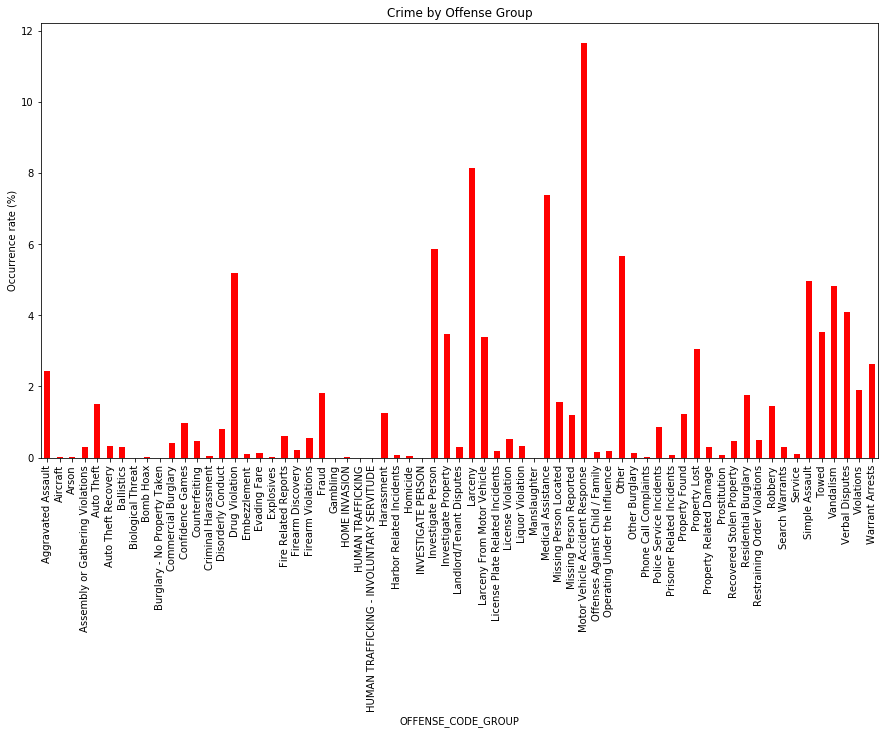

In [21]:
df_offense.plot(kind='bar',title="Crime by Offense Group", color='r', figsize=(15,8), fontsize=10)
plt.ylabel('Occurrence rate (%)')



In [22]:
# %-of top ten crimes
df_offence_large = df_offense.nlargest(10)
df_offence_large

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    11.637462
Larceny                             8.128234
Medical Assistance                  7.377622
Investigate Person                  5.876398
Other                               5.664848
Drug Violation                      5.186274
Simple Assault                      4.959993
Vandalism                           4.831183
Verbal Disputes                     4.105330
Towed                               3.537435
Name: OFFENSE_CODE_GROUP, dtype: float64

In [23]:
# Defining a function which will consider the following crimes as individual crimes and rest of as Others:
def topnine(row):
    keep = ["Motor Vehicle Accident Response", "Larceny",
            "Medical Assistance", "Investigate Person",
            "Drug Violation",
            "Simple Assault", "Vandalism",
            "Verbal Disputes", "Towed"]
    
    if row not in keep:
        
        return "OTHERS"
    else:
        
        return row

In [24]:
# Let us create a new columnith the topnine function:

df["New_Type"] = df["OFFENSE_CODE_GROUP"].apply(topnine)

In [25]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,New_Type
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",Larceny
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",Vandalism
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",Towed
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",OTHERS
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",OTHERS


In [26]:
# Creating a dataframe returing '%' of top crime offense and others:

df_offense_top = df.groupby(['New_Type'])['New_Type'].count()/len(df)*100

In [27]:
df_offense_top

New_Type
Drug Violation                      5.186274
Investigate Person                  5.876398
Larceny                             8.128234
Medical Assistance                  7.377622
Motor Vehicle Accident Response    11.637462
OTHERS                             44.360068
Simple Assault                      4.959993
Towed                               3.537435
Vandalism                           4.831183
Verbal Disputes                     4.105330
Name: New_Type, dtype: float64

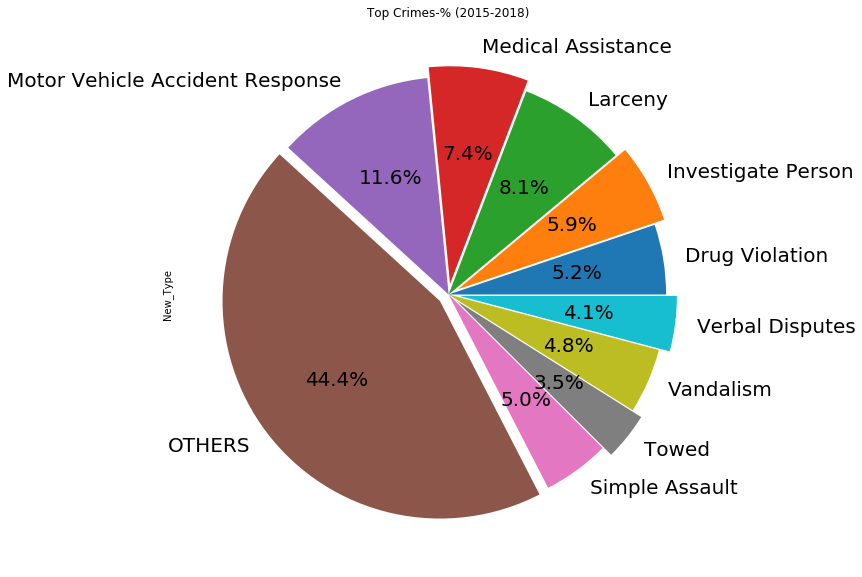

In [28]:
explode = [0,0.05,0,0.05,0,0.05,0,0.05,0,0.05]
df_offense_top.plot.pie(autopct="%.1f%%",title="Top Crimes-% (2015-2018)", figsize=(20,10), explode=explode, fontsize=20)